In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(0)

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\FuelConsumption.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import KFold

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size= 0.2, random_state= 0)

NameError: name 'X' is not defined

======K_fold-1=======
MSE 1016.6188512364969
MAE 92.5435621294948
R2 0.7240568835290009
======K_fold-2=======
MSE 1130.3379904678209
MAE 92.59025556226337
R2 0.7375419760808071
======K_fold-3=======
MSE 507.0401538315577
MAE 93.01054902449262
R2 0.6862868877562196


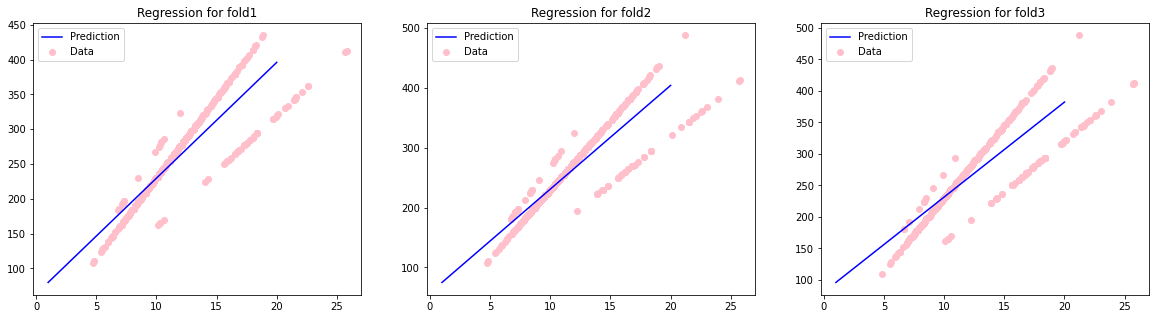

In [22]:
X = data[['FUELCONSUMPTION_COMB']]
Y = data[['CO2EMISSIONS']]

# K-Fold
# Regression Analysis
line = np.linspace(1,20,1000).reshape(-1,1)

# Creating Plotting area
fig, axes = plt.subplots(1,3, figsize=(20,5))

low = 0
up = data.shape[0]
folds = KFold(n_splits= 3)
fold = 0



for splits , ax in zip(folds.split(range(low,up)), axes):
    x = X.iloc[splits[0]]
    y = Y.iloc[splits[0]]

    xtest = X.iloc[splits[1]]
    ytest = Y.iloc[splits[1]]

    kfold_model = LinearRegression()

    kfold_model.fit(x, y)

    yhat = kfold_model.predict(xtest)
    fold += 1
    print(f'======K_fold-{fold}=======')
    print('MSE', mean_squared_error(yhat, ytest))
    print('MAE', 100 - mean_absolute_percentage_error(yhat, ytest)*100)
    print('R2', r2_score(yhat, ytest))

    ax.scatter(x.values, y, c = 'pink', label = 'Data')
    ax.plot(line, kfold_model.predict(line), c = 'blue' , label = 'Prediction')
    ax.legend()
    ax.set_title(f'Regression for fold{fold}')


=======K-3========
MSE 578.100177028012
MAE 6.088960143621484
r2 0.8416513307442112
=======K-5========
MSE 536.9508153701968
MAE 5.735450153103193
r2 0.8530966202760636
=======K-7========
MSE 535.7108237859343
MAE 5.653928850796248
r2 0.8531891881896975
=======K-9========
MSE 553.4550082728776
MAE 5.665961681351995
r2 0.8440020315788883


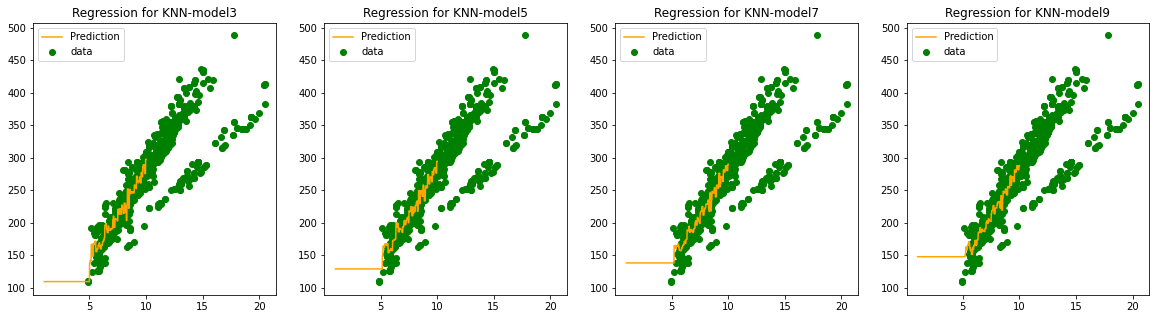

In [17]:
# KNN algorithm
X = data[['FUELCONSUMPTION_HWY']]
Y = data[['CO2EMISSIONS']]
# x = X.iloc[train]
# y = Y.iloc[train]
# xt = X.iloc[test]
# yt = Y.iloc[test]

line = np.linspace(1,10, 1000).reshape(-1,1)
fig, axes = plt.subplots(1,4, figsize =(20,5))
from sklearn.neighbors import KNeighborsRegressor
ks = [3,5,7,9]

for k , ax in zip(ks, axes):
    knn_model = KNeighborsRegressor(n_neighbors= k)
    knn_model.fit(X.values, Y.values)
    yhat = knn_model.predict(X.values)

    ax.scatter(X.values, Y.values, c = 'green', label = 'data')
    ax.plot(line, knn_model.predict(line), c = 'orange', label = 'Prediction')
    ax.legend()
    ax.set_title(f'Regression for KNN-model{k}')
    
    print(f'=======K-{k}========')
    print('MSE', mean_squared_error(yhat, Y.values))
    print('MAE', mean_absolute_percentage_error(yhat, Y.values)*100)
    print('r2', r2_score(yhat, Y.values))

In [24]:
# KNN algorithm
X = data[['FUELCONSUMPTION_HWY']]
Y = data[['CO2EMISSIONS']]

x = X.iloc[train]
y = Y.iloc[train]
xt = X.iloc[test]
yt = Y.iloc[test]

line = np.linspace(1,10, 1000).reshape(-1,1)
fig, axes = plt.subplots(1,4, figsize =(20,5))
from sklearn.neighbors import KNeighborsRegressor
ks = [3,5,7,9]

for k , ax in zip(ks, axes):
    knn_model = KNeighborsRegressor(n_neighbors= k)
    knn_model.fit(x.values, y.values)
    yhat = knn_model.predict(xt.values)

    ax.scatter(x.values, y.values, c = 'green', label = 'data')
    ax.plot(line, knn_model.predict(line), c = 'orange', label = 'Prediction')
    ax.legend()
    ax.set_title(f'Regression for KNN-model{k}')
    
    print(f'=======K-{k}========')
    print('MSE', mean_squared_error(yhat, yt.values))
    print('MAE', mean_absolute_percentage_error(yhat, yt.values)*100)
    print('r2', r2_score(yhat, yt.values))

TypeError: 'int' object is not iterable

MSE 854.3228443012201
MAE 91.20923228606604
R2 0.7294702168866218


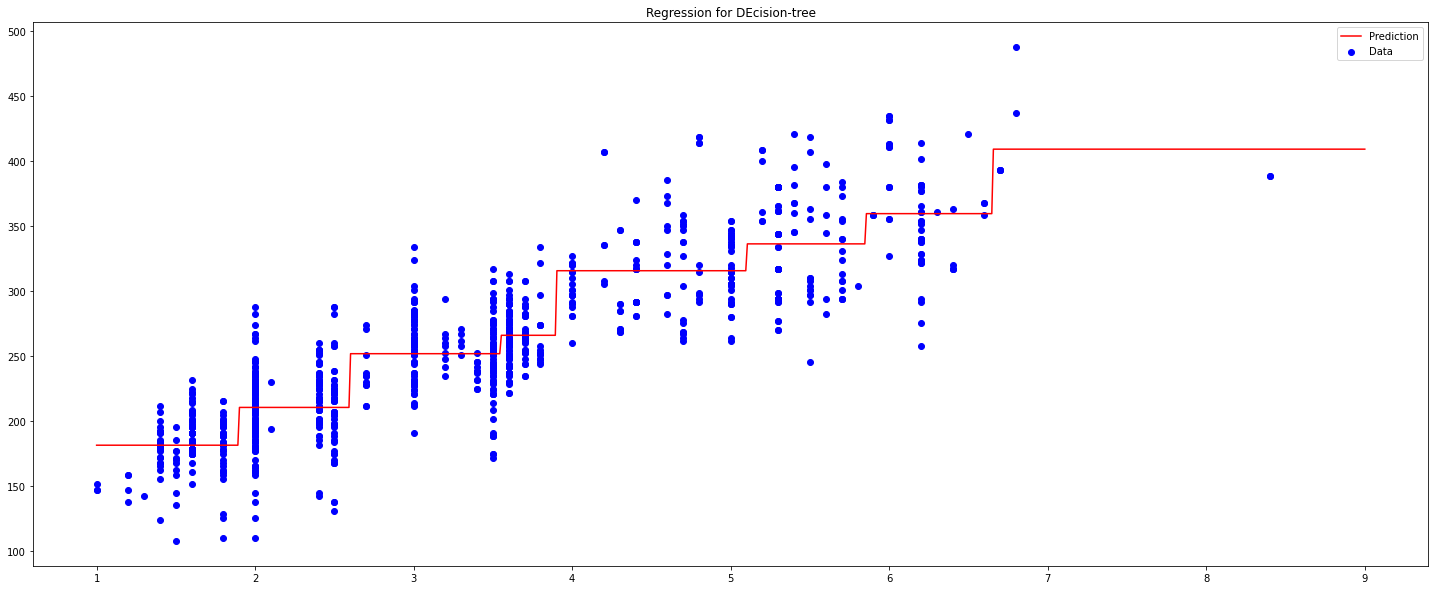

In [25]:
X = data[['ENGINESIZE']]
Y = data[['CO2EMISSIONS']]

line = np.linspace(1,9,800).reshape(-1, 1)
fig , axes = plt.subplots(1,1, figsize= (25,10))

from sklearn import tree
dt_model = tree.DecisionTreeRegressor(criterion= 'mse', max_depth= 3, max_leaf_nodes= int(np.sqrt(np.array([860]))))
dt_model.fit(X, Y)
yhat = dt_model.predict(X.values)

axes.scatter(X, Y, c='blue', label = 'Data' )
axes.plot(line, dt_model.predict(line), c = 'red', label = 'Prediction')
axes.legend()
axes.set_title('Regression for DEcision-tree')
print('MSE', mean_squared_error(yhat, Y.values))
print('MAE', 100 - mean_absolute_percentage_error(yhat, Y.values)*100)
print('R2', r2_score(yhat, Y.values))

mse 316.01831975558645
r2 0.9134222695757669


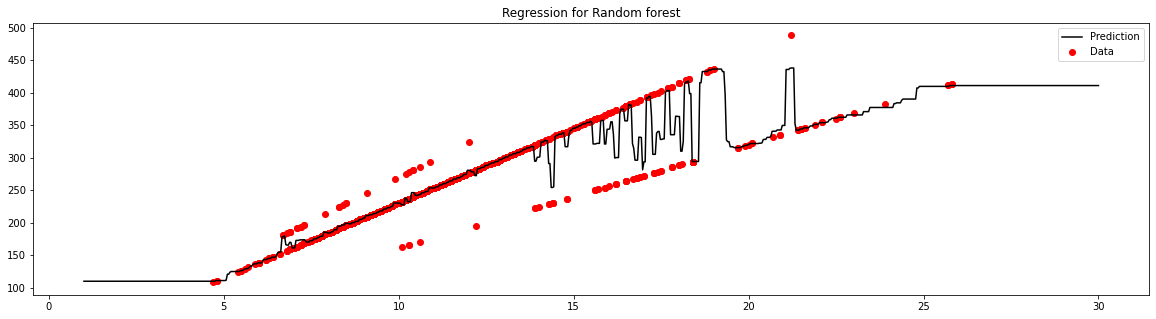

In [21]:
from sklearn.ensemble import RandomForestRegressor
Xtrain = data[['FUELCONSUMPTION_COMB']]
Ytrain = data[['CO2EMISSIONS']].values.ravel()
Xtest = data[['FUELCONSUMPTION_COMB']]
Ytest = data[['CO2EMISSIONS']].values.ravel()

line = np.linspace(1,30,800).reshape(-1,1)
fig, axes = plt.subplots(1,1, figsize=(20,5))
rf_model = RandomForestRegressor(n_estimators=90, random_state=0)
rf_model.fit(Xtrain, Ytrain)
yhat = rf_model.predict(Xtest)

axes.scatter(Xtrain, Ytrain, c='red', label='Data')
axes.plot(line, rf_model.predict(line), c= 'black', label= 'Prediction')
axes.legend()
axes.set_title('Regression for Random forest')
print('mse', mean_squared_error(yhat, Ytest))
print('r2', r2_score(yhat, Ytest))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
X = data[['CYLINDERS']]
Y = data[['CO2EMISSIONS']]

low = 0
up = data.shape[0]
folds = KFold(n_splits=5)
fold = 0

for splits , ax in zip(folds.split(range(low,up)), axes):
    Xtrain = X.iloc[splits[0]]
    Ytrain = Y.iloc[splits[0]]

    Xtest = X.iloc[splits[1]]
    Ytest = Y.iloc[splits[1]]
    kfold_model = LinearRegression